<a href="https://colab.research.google.com/github/saulotp/project_how-can-we-increase-revenue/blob/main/Increase_company_revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project_name:** How can we increase our revenue?
# **Objective:** In this project, a promissor start-up contact us asking for help in how they can increase the company revenue. We, data science enthusiasts accepted this challenge seeing a great oppotunity to increase our knowledge and testing our skills in Data Analysis.

# **What_we_have:** The company send to us a single database contain some data about the ways of where the company investing their capital and how much is returning in sales form.



# **Step by step**

the code below is just for mount my google drive where the database file are.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For first we have to import the python library that will help us to open our file as a DataFrame.

In [ ]:
import pandas as pd

Now we can open the csv file to see how the data are structured 

In [ ]:
main_df = pd.read_csv('/content/drive/MyDrive/DataScience/Projetos/How can we increase our revenue?/advertising.csv')
main_df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Our Dataframe has 200 rows and 4 columns. Let's see if we have some null data

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


well we have 200 rows with 200 values non-null. The data type is float for all dataframe.

With comand describe() we can see some information about mean, count of fields, min/max values etc.

In [ ]:
main_df.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Now we can plot some data to have a better visualization. For this we can import library seaborn. 
PS. the library warnings is to stop seaborn plot warnings, it doens't required to carry out the analysis.

In [ ]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

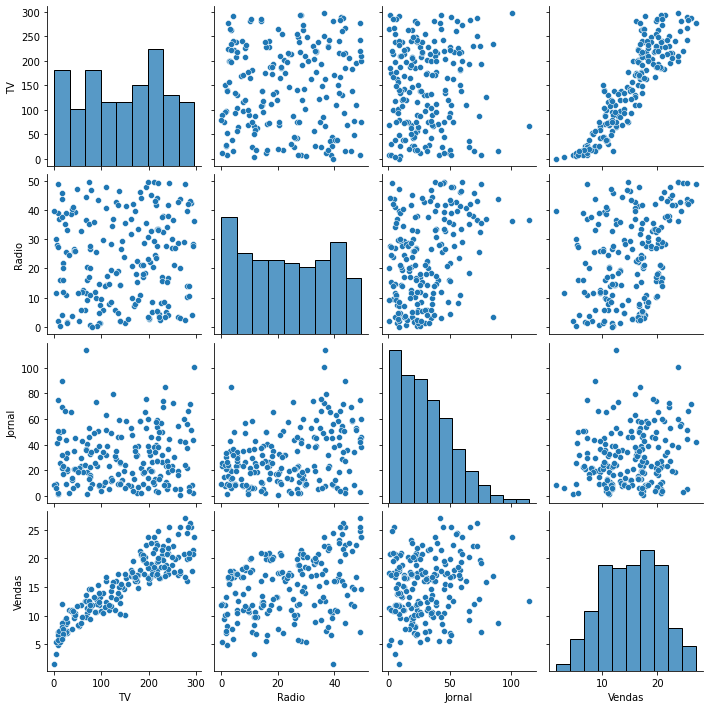

In [ ]:
sns.pairplot(main_df)

The pairplot chart show us come interesting data about TV and Sales. There is a possible correlation between this data, because we can see as TV investment increases, sales increse too. About the others data, their doens't seem to have a pattern. Let's plot another type of chart to try extract more information.

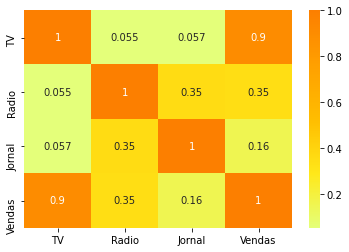

In [ ]:
sns.heatmap(main_df.corr(), cmap='Wistia', annot=True)

The image above is a heatmap, as more near to number one, more the data can be related. Once again, TV and sales looks like have some kind of correlation. 

With this data we can solve the problem showing that with a better investment in TV can increase the company revenue. But let's play a little with machine learning and see what can we do.

For first we will select what data the algorithm will use to be trained.

In [ ]:
#importing train library
from sklearn.model_selection import train_test_split

#selecting columns to be trained
x = main_df.drop('Vendas', axis=1)
y = main_df['Vendas']

#spliting the train data in 'data to train' and 'data to test'
#'test size' mean that the algorithm will be trained with 70% of all data, and
# will use 30% for test. But why we can't train our algorithm with 100% of data
# and create an ultimate powerfull AI? Doing this, we only will make our AI do
# CTRL+C / CTRL+V, the algorithm will be very in copy past and not in predict
# values.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In this case we want to predict a numeric value to sales, then we need a regressor algorithm. How we have 3 variables to find our sale value, we will use a decision tree algorithm. (If we have 2 values that have some correlation, TV-Sales for example, we can use a simple linear regression, but with multiple variables, decision tree is more indicate.

In [ ]:
## importing algorithms librarys that will be used
## We will use 2 kinds of decision tree and see wich will bring us a better
## result (random forest and extratree)
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


randomforest = RandomForestRegressor()
extratree = ExtraTreesRegressor()


## algorithm training
randomforest.fit(x_train, y_train)
extratree.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

After training we can measure how accurate our algorithms are.


In [ ]:
from sklearn import metrics

test_random = randomforest.predict(x_test)
test_extra = extratree.predict(x_test)

r2_random = metrics.r2_score(y_test, test_random)
r2_extra = metrics.r2_score(y_test, test_extra)

print('R²')
print(f'randomforest = {r2_random:.2%}')
print(f'extratree    = {r2_extra:.2%}')

print('='*20)

erro_random = metrics.mean_squared_error(y_test, test_random)
erro_extratree = metrics.mean_squared_error(y_test, test_extra)

print('error')
print(f'randomforest = {erro_random:.2f}')
print(f'extratree    = {erro_extratree:.2f}')
print('='*20)

R²
randomforest = 93.09%
extratree    = 93.80%
error
randomforest = 2.08
extratree    = 1.86


The extratree algorithm show us a better accurace with a precision of 93.80% and 1.86 error. Then we will use the extratree for make our predictions.

Ploting the algorithm performance.

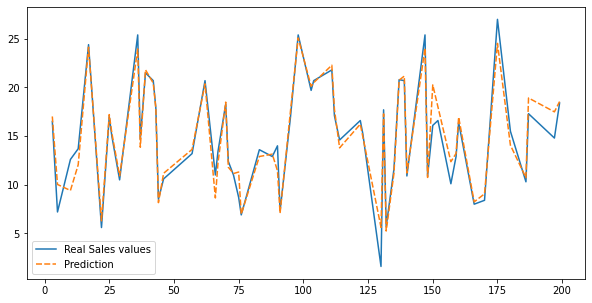

In [ ]:
import matplotlib.pyplot as plt


## criando outro DF para adicionar os valores testados nas previsões.
comparative_table = pd.DataFrame()
comparative_table['Real Sales values'] = y_test
comparative_table['Prediction'] = test_extra

## plot com as informações
plt.figure(figsize=(10,5))
sns.lineplot(data=comparative_table)

If we want to compare the predicted with the real data, we can print the dataframe.

In [ ]:
display(comparative_table.head())

,Real Sales values,Prediction
25,17.0,17.211
157,10.1,12.366
26,15.0,15.329
42,20.7,20.444
37,14.7,13.858


In [ ]:
## for measure wich variable has more importance in our algorithm we can use
## the command 'feature_importances_'
print(extratree.feature_importances_)

[0.83086521 0.15244255 0.01669225]


Our columns are:<br>
1º TV<br>
2º Radio<br>
3º NewsPaper<br>
For now we know that the TV has more importance on the sales result. Radio and Newspaper are almost the same but looks like investments in Newspaper return more value in sales company. What happen if we make a prediction simulating more investments in TV and Newspaper and for radio leaves a poor value?

To predict values we have to use the command 'used algorithm + predict([[values]]', in this case the code will be:<br>
extratree.predict([['tv_value', 'radio_value', 'Newpaper_value']])
let's play with the investment numbers, we have 100% to split in TV, radio and Newspaper, let's see what we can do.

In [ ]:
print(extratree.predict([['80','10', '10']]))
print(extratree.predict([['50','10', '40']]))
print(extratree.predict([['50','25', '25']]))
print(extratree.predict([['20','30', '50']]))
print(extratree.predict([['40','30', '30']]))
print(extratree.predict([['10','80', '10']]))

[11.565]
[9.061]
[10.276]
[7.934]
[9.952]
[8.467]


With this data we can conclude that for increase the company revenue, just inject a better importance in TV and the sales will increase.

In this case we don't look for statistical data and i'm sorry for that, but remember, I'm just a student trying to learn some things about data science. I hope this article has been helpfull to you, I have a lot to learn yet. But if you have some suggestion in how can we increase the analysis about this case, fell free to talk with me.

- saulodetp@gmail.com